# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

ENEM 2016 - Data from ENEM 2016, the Brazilian High School National Exam. 
Disponível em https://www.kaggle.com/gbonesso/enem-2016
Exploração de dados sobre resultados do ENEM (entrantes do ensino superior) pode auxiliar projetos de pesquisa em desenvolvimento no LATACI Research Institute, onde atuo.
O arquivo original possui mais de 8 milhões de linhas, e optei por gerar um com apenas 15 mil linhas para este projeto.
Função create_subset() disponível em maxpy
Optei por explorar o arquivo somente com comandos python, por exemplo mostrando as 166 colunas e fazendo a eliminação.

In [2]:
import pandas as pd
import numpy as np
from maxpy import *
import pandas_profiling
import seaborn as sns

arquivo = create_subset("microdados_enem_2016.csv", 15000)

D:\programs\Anaconda3\envs\python\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "D:\programs\Anaconda3\envs\python\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\programs\Anaconda3\envs\python\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\programs\Anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\programs\Anaconda3\envs\python\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "D:\programs\Anaconda3\envs\python\lib\site-packages\ipykernel\kernelapp.py", line 563, 

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- O arquivo original possui 166 colunas. Para este projeto, serão selecionados estados de residência e de realização das provas; idade; sexo; se é treineiro ou não; os tipos (códigos) e as notas de Ciências da Natureza (CN), Ciências Humanas (CH), Linguagens e Códigos (LC), Matemática (MAT) e redação; se possui algum tipo de deficiência (dislexia, discalculia, baixa visão, cegueira, surdez, deficiência auditiva, surdo e cego, deficiência física, déficit de atenção, autismo, visão monocular, outra deficiência). Os tipos de deficiência seguem as colunas definidas no arquivo.
- Todas as variáveis selecionadas são discretas, exceto as notas.


In [3]:
enem2016 = pd.read_csv(arquivo, encoding = "ISO-8859-1")

print(enem2016.info())
print(enem2016.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 166 entries, NU_INSCRICAO to Q050
dtypes: float64(36), int64(75), object(55)
memory usage: 19.0+ MB
None
NU_INSCRICAO               15000
NU_ANO                     15000
CO_MUNICIPIO_RESIDENCIA    15000
NO_MUNICIPIO_RESIDENCIA    15000
CO_UF_RESIDENCIA           15000
SG_UF_RESIDENCIA           15000
NU_IDADE                   15000
TP_SEXO                    15000
TP_ESTADO_CIVIL            14271
TP_COR_RACA                15000
TP_NACIONALIDADE           15000
CO_MUNICIPIO_NASCIMENTO    14585
NO_MUNICIPIO_NASCIMENTO    14585
CO_UF_NASCIMENTO           14585
SG_UF_NASCIMENTO           14585
TP_ST_CONCLUSAO            15000
TP_ANO_CONCLUIU            15000
TP_ESCOLA                  15000
TP_ENSINO                   1244
IN_TREINEIRO               15000
CO_ESCOLA                   1244
CO_MUNICIPIO_ESC            1244
NO_MUNICIPIO_ESC            1244
CO_UF_ESC                   1244
SG_UF_ESC         

In [4]:
# Excluir colunas

colunas = ["NU_INSCRICAO", "NU_ANO", "CO_MUNICIPIO_RESIDENCIA", "NO_MUNICIPIO_RESIDENCIA", "TP_ESTADO_CIVIL", "TP_COR_RACA", "TP_NACIONALIDADE", "CO_MUNICIPIO_NASCIMENTO", "NO_MUNICIPIO_NASCIMENTO", "CO_UF_NASCIMENTO", "SG_UF_NASCIMENTO", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", "TP_ESCOLA", "TP_ENSINO", "CO_ESCOLA", "CO_MUNICIPIO_ESC", "NO_MUNICIPIO_ESC", "CO_UF_ESC", "SG_UF_ESC", "TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC", "TP_SIT_FUNC_ESC", "IN_SABATISTA", "IN_GESTANTE", "IN_LACTANTE", "IN_IDOSO", "IN_ESTUDA_CLASSE_HOSPITALAR", "IN_SEM_RECURSO", "IN_BRAILLE", "IN_AMPLIADA_24", "IN_AMPLIADA_18", "IN_LEDOR", "IN_ACESSO", "IN_TRANSCRICAO", "IN_LIBRAS", "IN_LEITURA_LABIAL", "IN_MESA_CADEIRA_RODAS", "IN_MESA_CADEIRA_SEPARADA", "IN_APOIO_PERNA", "IN_GUIA_INTERPRETE", "IN_MACA", "IN_COMPUTADOR", "IN_CADEIRA_ESPECIAL", "IN_CADEIRA_CANHOTO", "IN_CADEIRA_ACOLCHOADA", "IN_PROVA_DEITADO", "IN_MOBILIARIO_OBESO", "IN_LAMINA_OVERLAY", "IN_PROTETOR_AURICULAR", "IN_MEDIDOR_GLICOSE", "IN_MAQUINA_BRAILE", "IN_SOROBAN", "IN_MARCA_PASSO", "IN_SONDA", "IN_MEDICAMENTOS", "IN_SALA_INDIVIDUAL", "IN_SALA_ESPECIAL", "IN_SALA_ACOMPANHANTE", "IN_MOBILIARIO_ESPECIFICO", "IN_MATERIAL_ESPECIFICO", "IN_NOME_SOCIAL", "IN_CERTIFICADO", "NO_ENTIDADE_CERTIFICACAO", "CO_UF_ENTIDADE_CERTIFICACAO", "SG_UF_ENTIDADE_CERTIFICACAO", "CO_MUNICIPIO_PROVA", "NO_MUNICIPIO_PROVA", "CO_UF_PROVA", "TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT", "TX_RESPOSTAS_CN", "TX_RESPOSTAS_CH", "TX_RESPOSTAS_LC", "TX_RESPOSTAS_MT", "TP_LINGUA", "TX_GABARITO_CN", "TX_GABARITO_CH", "TX_GABARITO_LC", "TX_GABARITO_MT", "TP_STATUS_REDACAO", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "Q001", "Q002", "Q003", "Q004", "Q005", "Q006", "Q007", "Q008", "Q009", "Q010", "Q011", "Q012", "Q013", "Q014", "Q015", "Q016", "Q017", "Q018", "Q019", "Q020", "Q021", "Q022", "Q023", "Q024", "Q025", "Q026", "Q027", "Q028", "Q029", "Q030", "Q031", "Q032", "Q033", "Q034", "Q035", "Q036", "Q037", "Q038", "Q039", "Q040", "Q041", "Q042", "Q043", "Q044", "Q045", "Q046", "Q047", "Q048", "Q049", "Q050"]
drop_columns(enem2016, colunas)

print(enem2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 28 columns):
CO_UF_RESIDENCIA           15000 non-null int64
SG_UF_RESIDENCIA           15000 non-null object
NU_IDADE                   15000 non-null int64
TP_SEXO                    15000 non-null object
IN_TREINEIRO               15000 non-null int64
IN_BAIXA_VISAO             15000 non-null int64
IN_CEGUEIRA                15000 non-null int64
IN_SURDEZ                  15000 non-null int64
IN_DEFICIENCIA_AUDITIVA    15000 non-null int64
IN_SURDO_CEGUEIRA          15000 non-null int64
IN_DEFICIENCIA_FISICA      15000 non-null int64
IN_DEFICIENCIA_MENTAL      15000 non-null int64
IN_DEFICIT_ATENCAO         15000 non-null int64
IN_DISLEXIA                15000 non-null int64
IN_DISCALCULIA             15000 non-null int64
IN_AUTISMO                 15000 non-null int64
IN_VISAO_MONOCULAR         15000 non-null int64
IN_OUTRA_DEF               15000 non-null int64
SG_UF_PROVA              

In [5]:
# Testar valores únicos de IN_DISLEXIA, IN_DISLEXIA, IN_BAIXA_VISAO, IN_CEGUEIRA, IN_SURDEZ, IN_DEFICIENCIA_AUDITIVA, IN_SURDO_CEGUEIRA, IN_DEFICIENCIA_FISICA, IN_DEFICIENCIA_MENTAL, IN_DEFICIT_ATENCAO, IN_AUTISMO, IN_VISAO_MONOCULAR, IN_OUTRA_DEF
unique_values(enem2016, 'IN_DISLEXIA')
unique_values(enem2016, 'IN_DISCALCULIA')
unique_values(enem2016, 'IN_BAIXA_VISAO')
unique_values(enem2016, 'IN_CEGUEIRA')
unique_values(enem2016, 'IN_SURDEZ')
unique_values(enem2016, 'IN_DEFICIENCIA_AUDITIVA')
unique_values(enem2016, 'IN_SURDO_CEGUEIRA')
unique_values(enem2016, 'IN_DEFICIENCIA_FISICA')
unique_values(enem2016, 'IN_DEFICIENCIA_MENTAL')
unique_values(enem2016, 'IN_DEFICIT_ATENCAO')
unique_values(enem2016, 'IN_AUTISMO')
unique_values(enem2016, 'IN_VISAO_MONOCULAR')
unique_values(enem2016, 'IN_OUTRA_DEF')


Valores distintos de IN_DISLEXIA [0 1]
0    14998
1        2
dtype: int64 

Valores distintos de IN_DISCALCULIA [0 1]
0    14999
1        1
dtype: int64 

Valores distintos de IN_BAIXA_VISAO [0 1]
0    14989
1       11
dtype: int64 

Valores distintos de IN_CEGUEIRA [0 1]
0    14999
1        1
dtype: int64 

Valores distintos de IN_SURDEZ [0 1]
0    14998
1        2
dtype: int64 

Valores distintos de IN_DEFICIENCIA_AUDITIVA [0 1]
0    14987
1       13
dtype: int64 

Valores distintos de IN_SURDO_CEGUEIRA [0 1]
0    14999
1        1
dtype: int64 

Valores distintos de IN_DEFICIENCIA_FISICA [0 1]
0    14953
1       47
dtype: int64 

Valores distintos de IN_DEFICIENCIA_MENTAL [0 1]
0    14998
1        2
dtype: int64 

Valores distintos de IN_DEFICIT_ATENCAO [0 1]
0    14985
1       15
dtype: int64 

Valores distintos de IN_AUTISMO [0 1]
0    14999
1        1
dtype: int64 

Valores distintos de IN_VISAO_MONOCULAR [0 1]
0    14991
1        9
dtype: int64 

Valores distintos de IN_OUTRA_DEF

In [6]:
# Agrupar as colunas de outras deficiências em uma única coluna
enem2016['def'] = 'NaN'
for index, row in enem2016.iterrows():
    enem2016.loc[index,'def'] = bool(enem2016.loc[index, 'IN_DISCALCULIA']) or bool(enem2016.loc[index, 'IN_DISLEXIA']) or bool(enem2016.loc[index, 'IN_BAIXA_VISAO']) or bool(enem2016.loc[index, 'IN_CEGUEIRA']) or bool(enem2016.loc[index, 'IN_SURDEZ']) or bool(enem2016.loc[index, 'IN_DEFICIENCIA_AUDITIVA']) or bool(enem2016.loc[index, 'IN_SURDO_CEGUEIRA']) or bool(enem2016.loc[index, 'IN_DEFICIENCIA_FISICA']) or bool(enem2016.loc[index, 'IN_DEFICIENCIA_MENTAL']) or bool(enem2016.loc[index, 'IN_DEFICIT_ATENCAO']) or bool(enem2016.loc[index, 'IN_AUTISMO']) or bool(enem2016.loc[index, 'IN_VISAO_MONOCULAR']) or bool(enem2016.loc[index, 'IN_OUTRA_DEF'])

# Selecionar colunas
enem2016 = enem2016[['NU_IDADE', 'TP_SEXO', 'IN_TREINEIRO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'SG_UF_PROVA', 'def', 'CO_PROVA_CN', 'NU_NOTA_CN', 'CO_PROVA_CH', 'NU_NOTA_CH', 'CO_PROVA_LC', 'NU_NOTA_LC', 'CO_PROVA_MT', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

# Renomear colunas
enem2016.columns = ['idade', 'sexo', 'treineiro', 'cod_uf_resid', 'uf_resid', 'uf_prova', 'def', 'cod_prova_cn', 'nota_cn', 'cod_prova_ch', 'nota_ch', 'cod_prova_lc', 'nota_lc', 'cod_prova_mat', 'nota_mat', 'nota_redacao']

print(enem2016.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
idade            15000 non-null int64
sexo             15000 non-null object
treineiro        15000 non-null int64
cod_uf_resid     15000 non-null int64
uf_resid         15000 non-null object
uf_prova         15000 non-null object
def              15000 non-null bool
cod_prova_cn     11128 non-null float64
nota_cn          11128 non-null float64
cod_prova_ch     11128 non-null float64
nota_ch          11128 non-null float64
cod_prova_lc     10856 non-null float64
nota_lc          10856 non-null float64
cod_prova_mat    10856 non-null float64
nota_mat         10856 non-null float64
nota_redacao     10856 non-null float64
dtypes: bool(1), float64(9), int64(3), object(3)
memory usage: 1.7+ MB
None


*Descrição da base e suas variáveis*

### 3) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [7]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# Calcular número de linhas e colunas
# Listar features e seu tipo de dados
print(enem2016.info())

# Existe consistência no número de linhas com valores não nulos de cod_prova_cn, nota_cn, cod_prova_ch e nota_ch, e de cod_prova_lc, nota_lc, cod_prova_mat, nota_mat e nota_redacao.
# A diferença do número de linhas aparentemente se justifica por desistência no segundo dia, pois as provas de CN e CH foram realizadas no dia 05/11/16, e as de LC, MAT e Redação no dia 06/11/2016, conforme veiculado em https://www.enem.vestibulandoweb.com.br/data-enem-2016.html
# As linhas sem todas as provas serão eliminadas no pré-processamento


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
idade            15000 non-null int64
sexo             15000 non-null object
treineiro        15000 non-null int64
cod_uf_resid     15000 non-null int64
uf_resid         15000 non-null object
uf_prova         15000 non-null object
def              15000 non-null bool
cod_prova_cn     11128 non-null float64
nota_cn          11128 non-null float64
cod_prova_ch     11128 non-null float64
nota_ch          11128 non-null float64
cod_prova_lc     10856 non-null float64
nota_lc          10856 non-null float64
cod_prova_mat    10856 non-null float64
nota_mat         10856 non-null float64
nota_redacao     10856 non-null float64
dtypes: bool(1), float64(9), int64(3), object(3)
memory usage: 1.7+ MB
None


In [8]:
# PRÉ-PROCESSAMENTO - ANÁLISE INICIAL

# eliminar registros com cod_prova nulos
enem2016 = enem2016.dropna(subset=['cod_prova_cn'])
enem2016 = enem2016.dropna(subset=['cod_prova_ch'])
enem2016 = enem2016.dropna(subset=['cod_prova_lc'])
enem2016 = enem2016.dropna(subset=['cod_prova_mat'])

unique_values(enem2016, 'idade')
bins = [0, 17, 21, np.inf]
labels = ["0-16", "17-20", "20+"]
enem2016["faixa_etaria"] = pd.cut(enem2016["idade"], bins, labels=labels)

unique_values(enem2016, 'sexo')

unique_values(enem2016, 'treineiro')

unique_values(enem2016, 'uf_resid')
agrupa_estados_regiao(enem2016, "uf_resid", "regiao_resid")

unique_values(enem2016, 'uf_prova')
agrupa_estados_regiao(enem2016, "uf_prova", "regiao_prova")

unique_values(enem2016, 'def')

unique_values(enem2016, 'cod_prova_cn')
bins = [0, 399, 699, np.inf]
labels = ["0-399", "400-699", "700+"]
enem2016["faixa_nota_cn"] = pd.cut(enem2016["nota_cn"], bins, labels=labels)

unique_values(enem2016, 'cod_prova_ch')
bins = [0, 399, 699, np.inf]
labels = ["0-399", "400-699", "700+"]
enem2016["faixa_nota_ch"] = pd.cut(enem2016["nota_ch"], bins, labels=labels)

unique_values(enem2016, 'cod_prova_lc')
bins = [0, 399, 699, np.inf]
labels = ["0-399", "400-699", "700+"]
enem2016["faixa_nota_lc"] = pd.cut(enem2016["nota_lc"], bins, labels=labels)

unique_values(enem2016, 'cod_prova_mat')
bins = [0, 399, 699, np.inf]
labels = ["0-399", "400-699", "700+"]
enem2016["faixa_nota_mat"] = pd.cut(enem2016["nota_mat"], bins, labels=labels)

bins = [0, 399, 699, np.inf]
labels = ["0-399", "400-699", "700+"]
enem2016["faixa_nota_redacao"] = pd.cut(enem2016["nota_redacao"], bins, labels=labels)

# Resumo
print(enem2016.info())
enem2016.head(5)

Valores distintos de idade [23 20 21 17 19 29 60 16 18 24 26 22 25 28 30 36 32 33 34 41 50 31 15 37
 27 42 64 35 39 45 40 38 44 47 43 46 59 13 49 52 55 51 57 62 53 58 48 56
 54 14 63 66 78 65 68 61 67]
18    1657
19    1409
17    1043
20     992
21     774
22     629
23     493
24     483
16     410
25     318
26     271
28     245
27     243
29     199
30     168
33     165
32     150
31     139
34     105
35     101
36      93
15      84
37      74
39      68
38      67
42      51
41      44
40      42
44      40
45      38
43      33
46      23
50      21
47      19
49      17
48      13
54      12
51      12
14      11
55       9
53       9
52       8
57       7
58       6
62       5
59       4
56       3
64       2
63       2
60       2
78       1
13       1
66       1
61       1
65       1
67       1
68       1
dtype: int64 

Valores distintos de sexo ['M' 'F']
F    6431
M    4389
dtype: int64 

Valores distintos de treineiro [0 1]
0    10102
1      718
dtype: int64 

Valores dis

idade sexo  treineiro  cod_uf_resid uf_resid uf_prova    def  cod_prova_cn  \
0     23    M          0            25       PB       PB  False         292.0   
1     20    M          0            41       PR       PR  False         294.0   
2     21    M          0            29       BA       BA  False         292.0   
3     17    M          0            15       PA       PA  False         294.0   
5     20    M          0            23       CE       CE  False         294.0   

   nota_cn  cod_prova_ch        ...          nota_mat  nota_redacao  \
0    550.0         296.0        ...             462.9         580.0   
1    576.6         298.0        ...             423.6         560.0   
2    485.8         296.0        ...             414.6         480.0   
3    571.4         298.0        ...             709.4         620.0   
5    556.9         298.0        ...             708.1         600.0   

   faixa_etaria  regiao_resid  regiao_prova  faixa_nota_cn faixa_nota_ch  \
0           20+            NE            NE        400-699       400-699   
1         17-20             S             S        400-699       400-699   
2         17-20            NE            NE        400-699       400-699   
3          0-16             N             N        400-699       400-699   
5         17-20            NE            NE        400-699       400-699   

  faixa_nota_lc faixa_nota_mat faixa_nota_redacao  
0       400-699        400-699            400-699  
1       400-699        400-699            400-699  
2       400-699        400-699            400-699  
3       400-699           700+            400-699  
5       400-699           700+            400-699  

[5 rows x 24 columns]

### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


0 a 30: 87.15% - 9430 de 10820 registros 
31 a 59: 12.69% - 1373 de 10820 registros 
60+: 0.16% - 17 de 10820 registros


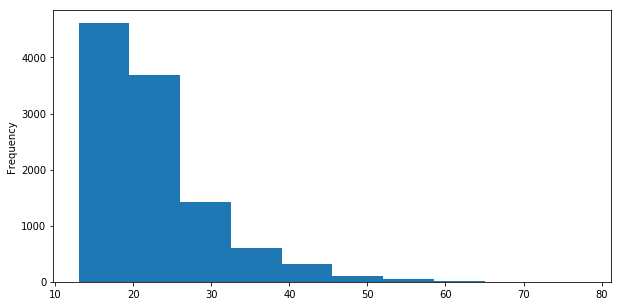

In [9]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

# Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?
faixa_etaria = {'0-30':0, '31-59':0, '60+':0}
total = 0
for idade in enem2016['idade']:
    total += 1
    if idade < 31:
        faixa_etaria['0-30'] += 1
    elif idade < 60:
        faixa_etaria['31-59'] += 1
    else:
        faixa_etaria['60+'] += 1

perc_0_30 = 100 * faixa_etaria['0-30'] / total
perc_31_59 = 100 * faixa_etaria['31-59'] / total
perc_60 = 100 * faixa_etaria['60+'] / total

print(f'0 a 30: {perc_0_30:.2f}% - {faixa_etaria["0-30"]} de {total} registros \n31 a 59: {perc_31_59:.2f}% - {faixa_etaria["31-59"]} de {total} registros \n60+: {perc_60:.2f}% - {faixa_etaria["60+"]} de {total} registros')

# histograma
enem2016["idade"].plot(kind="hist", figsize=(10,5))


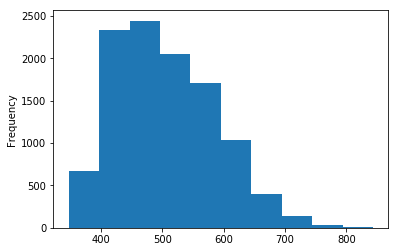

In [10]:
# Quantos % possui a nota de CN entre 0 e 399 pontos? 400 a 699? 700+?
# fazer analise para conclusoes
# histograma
enem2016["nota_cn"].plot(kind="hist")


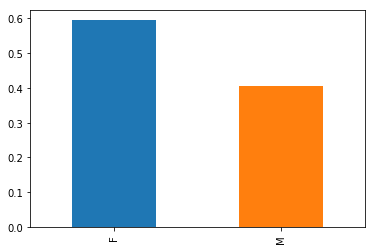

In [11]:
# Quantos % do conjunto de dados é do sexo feminino, quantos % é masculino?
ax = enem2016["sexo"].value_counts(normalize=True).plot(kind="bar")


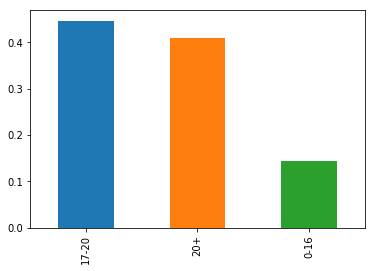

In [12]:
# Quantos % possui a idade entre 0 e 16 anos? 17 a 20? 20+?
enem2016["faixa_etaria"].value_counts(normalize=True).plot(kind="bar")

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


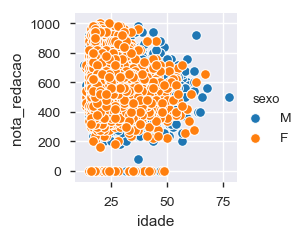

In [22]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# Independentes: idade e sexo
# Dependente: nota_redacao
sns.pairplot(enem2016, 
	             x_vars=["idade"], 
	             y_vars=["nota_redacao"],
	             hue = "sexo"
	             )


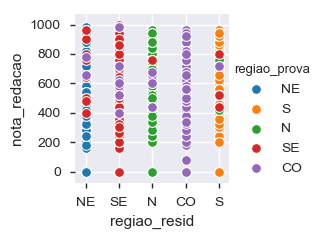

In [23]:
# Independentes: regiao_resid e regiao_prova
# Dependente: nota_redacao
sns.pairplot(enem2016, 
	             x_vars=["regiao_resid"], 
	             y_vars=["nota_redacao"],
	             hue = "regiao_prova"
	             )

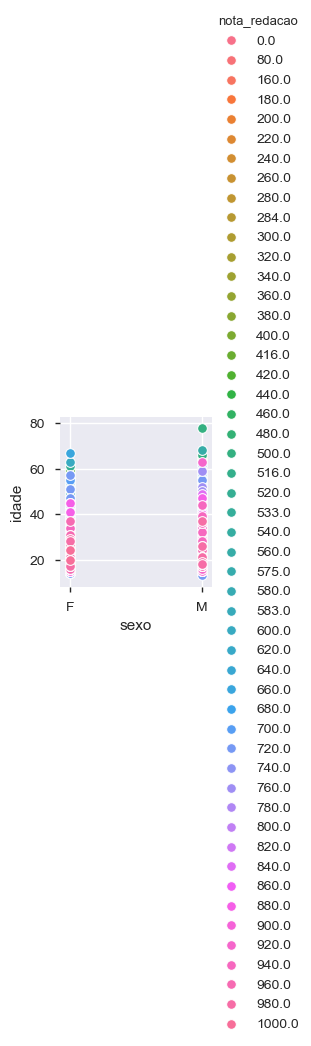

In [24]:
# Independentes: sexo e regiao_resid
# Dependente: nota_redacao
sns.pairplot(enem2016, 
	             x_vars=["sexo"], 
	             y_vars=["nota_redacao"],
	             hue = "faixa_etaria"
	             )

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [16]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# cod_prova e nota
correlacao(enem2016, "cod_prova_cn", "nota_cn")
correlacao(enem2016, "cod_prova_ch", "nota_ch")
correlacao(enem2016, "cod_prova_lc", "nota_lc")
correlacao(enem2016, "cod_prova_mat", "nota_mat")

# Aparentemente não existe correlação entre o tipo de prova e as notas.

0.0007263181863519428
0.01970762847499031
-0.027263363646744098
0.011955258542098597


In [17]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# idade e nota
correlacao(enem2016, "idade", "nota_cn")
correlacao(enem2016, "idade", "nota_ch")
correlacao(enem2016, "idade", "nota_lc")
correlacao(enem2016, "idade", "nota_mat")
correlacao(enem2016, "idade", "nota_redacao")


-0.09929147911112857
-0.028270343349033333
-0.0719183320111818
-0.09266951430370131
-0.18737105520132516


In [18]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# uf_resid e nota
correlacao(enem2016, "cod_uf_resid", "nota_cn")
correlacao(enem2016, "cod_uf_resid", "nota_ch")
correlacao(enem2016, "cod_uf_resid", "nota_lc")
correlacao(enem2016, "cod_uf_resid", "nota_mat")
correlacao(enem2016, "cod_uf_resid", "nota_redacao")


0.010018879359930717
0.029842891783321734
0.06346495687315587
0.03765906368907777
-0.01614836668157847


### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

In [19]:
pandas_profiling.ProfileReport(enem2016)